In [51]:
import pandas as pd
import numpy as np

df=pd.read_csv("https://raw.githubusercontent.com/Himanshu-1703/reddit-sentiment-analysis/main/data/reddit.csv")
df.head()



,clean_comment,category
0,family mormon have never tried explain them t...,1
1,buddhism has very much lot compatible with chr...,1
2,seriously don say thing first all they won get...,-1
3,what you have learned yours and only yours wha...,0
4,for your own benefit you may want read living ...,1


In [52]:
df.shape

(37249, 2)

In [53]:
df.sample()['clean_comment'].values

array(['let’ see his online devotees spin this'], dtype=object)

In [54]:
df.sample()['category'].values

array([1])

In [55]:
df.info

<bound method DataFrame.info of                                            clean_comment  category
0       family mormon have never tried explain them t...         1
1      buddhism has very much lot compatible with chr...         1
2      seriously don say thing first all they won get...        -1
3      what you have learned yours and only yours wha...         0
4      for your own benefit you may want read living ...         1
...                                                  ...       ...
37244                                              jesus         0
37245  kya bhai pure saal chutiya banaya modi aur jab...         1
37246              downvote karna tha par upvote hogaya          0
37247                                         haha nice          1
37248             facebook itself now working bjp’ cell          0

[37249 rows x 2 columns]>

In [56]:
df.isnull().sum()

clean_comment    100
category           0
dtype: int64

In [57]:
df[df['clean_comment'].isna()]

,clean_comment,category
413,NaN,0
605,NaN,0
2422,NaN,0
2877,NaN,0
3307,NaN,0
...,...,...
35975,NaN,0
36036,NaN,0
37043,NaN,0
37111,NaN,0


In [58]:
df[df['clean_comment'].isna()]['category'].value_counts()

category
0    100
Name: count, dtype: int64

In [59]:
df.dropna(inplace=True)

In [60]:
df.duplicated().sum()
df

,clean_comment,category
0,family mormon have never tried explain them t...,1
1,buddhism has very much lot compatible with chr...,1
2,seriously don say thing first all they won get...,-1
3,what you have learned yours and only yours wha...,0
4,for your own benefit you may want read living ...,1
...,...,...
37244,jesus,0
37245,kya bhai pure saal chutiya banaya modi aur jab...,1
37246,downvote karna tha par upvote hogaya,0
37247,haha nice,1


In [61]:
df[df.duplicated()]

,clean_comment,category
375,,0
392,,0
617,aurum mom,0
651,,0
1222,,0
...,...,...
36915,who won,0
37044,,0
37125,hari,0
37158,top kek,1


In [62]:
df.drop_duplicates(inplace=True)

In [63]:
df.duplicated().sum()

np.int64(0)

In [64]:
df[(df['clean_comment'].str.strip()=='')]


,clean_comment,category
181,,0
4432,\n,0
10592,,0
16173,,0
32149,\n,0
34959,,0


In [65]:
df[df['clean_comment'].apply(lambda x:x.endswith(' ') or x.startswith(' '))]

,clean_comment,category
0,family mormon have never tried explain them t...,1
1,buddhism has very much lot compatible with chr...,1
2,seriously don say thing first all they won get...,-1
3,what you have learned yours and only yours wha...,0
4,for your own benefit you may want read living ...,1
...,...,...
37241,let the janta decide not ulema clerics,0
37242,hona hai same with vaccination education insu...,0
37246,downvote karna tha par upvote hogaya,0
37247,haha nice,1


In [66]:
comments_with_newline=df['clean_comment'].str.contains('\n')
comments_with_newline.head()

0    False
1    False
2    False
3    False
4    False
Name: clean_comment, dtype: bool

In [67]:
df['clean_comment']=df['clean_comment'].str.replace('\n',' ',regex=True)
df
comments_with_newline_reamining=df[df['clean_comment'].str.contains('\n')]
comments_with_newline_reamining

,clean_comment,category


<Axes: xlabel='category', ylabel='count'>

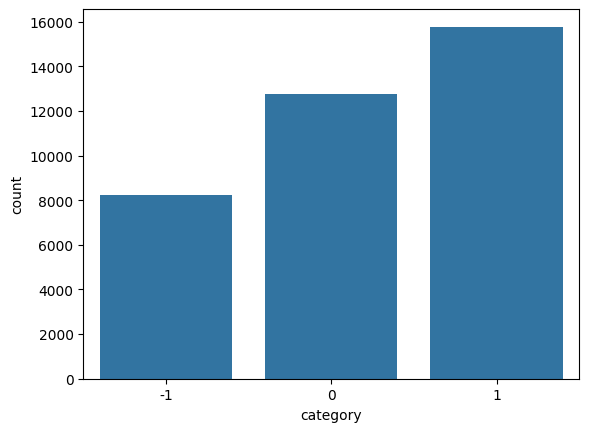

In [89]:
# EDA
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(data=df,x="category")

In [69]:
# frequency distribution of sentiments
df['category'].value_counts(normalize=True).mul(100).round(2)


category
 1    42.86
 0    34.72
-1    22.42
Name: proportion, dtype: float64

In [70]:
df['word_count']=df['clean_comment'].apply(lambda x: len(x.split()))
df.sample(5)

,clean_comment,category,word_count
23712,big brother modi aye,0,4
16772,don’ think ’ true saw this television only,1,8
24566,will move out this shithole before next diwal...,0,14
27342,should tweet this,0,3
27213,something ’ always struggled with since gettin...,1,155


In [71]:
df['word_count'].describe()

count    36799.000000
mean        29.662627
std         56.787371
min          0.000000
25%          6.000000
50%         13.000000
75%         30.000000
max       1307.000000
Name: word_count, dtype: float64

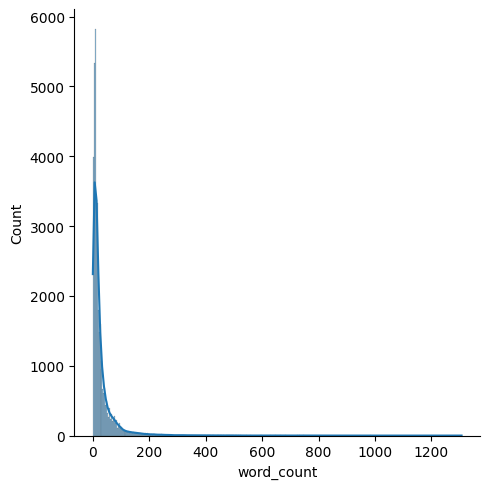

In [72]:
sns.displot(df['word_count'],kde=True)

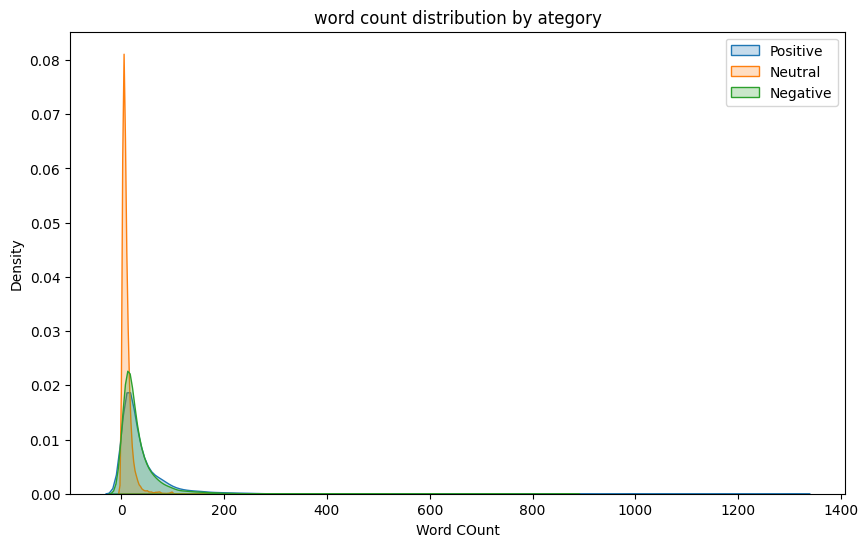

In [73]:
# create the figure and axes
plt.figure(figsize=(10,6))

#Plot KDE for category 1
sns.kdeplot(df[df['category']==1]['word_count'],label='Positive',fill=True)

# plot KDE for category 0
sns.kdeplot(df[df['category']==0]['word_count'],label='Neutral',fill=True)

# plot kde for category -1

sns.kdeplot(df[df['category']==-1]['word_count'],label='Negative',fill=True)

# Add title and labels

plt.title('word count distribution by ategory')
plt.xlabel('Word COunt')
plt.ylabel('Density')

# add legend
plt.legend()

# show the plot

plt.show()



<Axes: ylabel='word_count'>

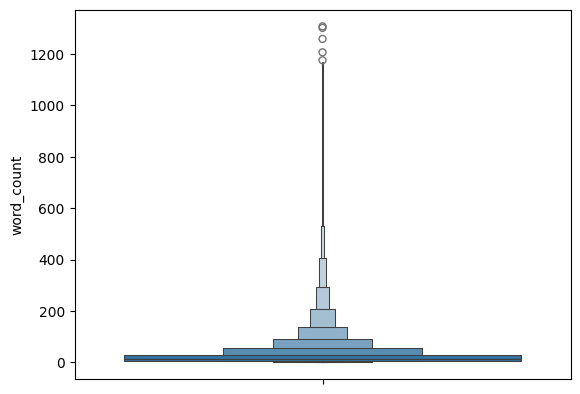

In [74]:
sns.boxenplot(df['word_count'])

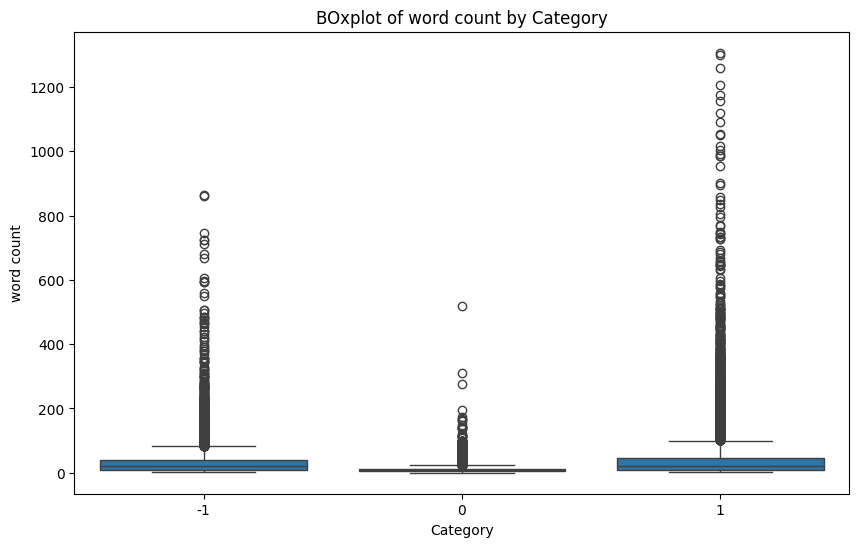

In [75]:
# create a boxplot for the word_count column categorized by 'category'
plt.figure(figsize=(10,6))
sns.boxplot(data=df,x='category',y='word_count')
plt.title('BOxplot of word count by Category')
plt.xlabel('Category')
plt.ylabel('word count')
plt.show()

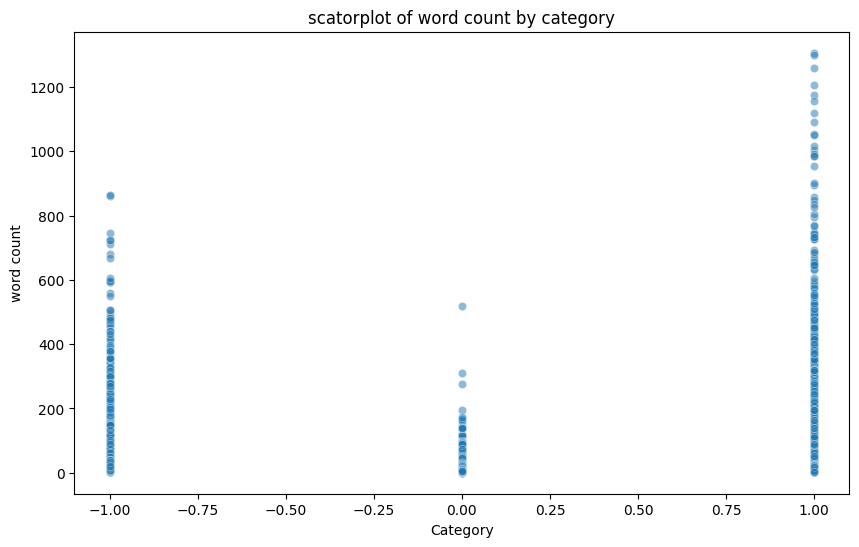

In [76]:
#scatter plot
plt.figure(figsize=(10,6))
sns.scatterplot(data=df,x='category',y='word_count',alpha=0.5)
plt.title('scatorplot of word count by category')
plt.xlabel('Category')
plt.ylabel('word count')
plt.show()

<Axes: xlabel='category', ylabel='word_count'>

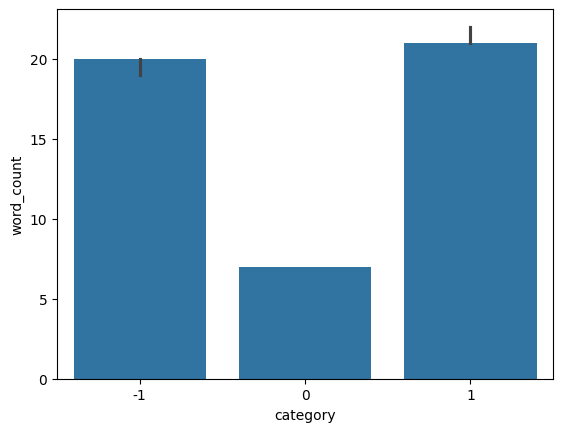

In [77]:
# median word ount among sentiment
sns.barplot(df,x='category',y='word_count',estimator='median')


In [78]:
!python -m pip install nltk

In [90]:
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')

# define the list of english stopwords
stop_words=set(stopwords.words('english'))

#crete a new column 'num_stop_words' by counting the number of stopwords in each letter

df['num_stop_words']=df['clean_comment'].apply(lambda x: len([word for word in x.split() if word in stop_words]))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ankit.h.vishwakarma\AppData\Roaming\nltk_data
[nltk_data]     ...
[nltk_data]   Package stopwords is already up-to-date!


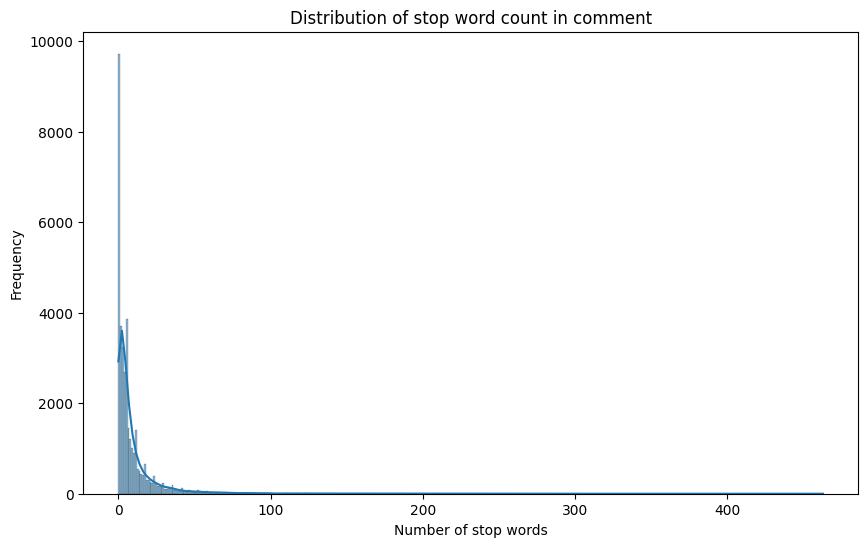

In [91]:
# create a distribution plot (displot ) for 'num_stop_words' column 
plt.figure(figsize=(10,6))
sns.histplot(df['num_stop_words'],kde=True)
plt.title('Distribution of stop word count in comment')
plt.xlabel('Number of stop words')
plt.ylabel('Frequency')
plt.show()

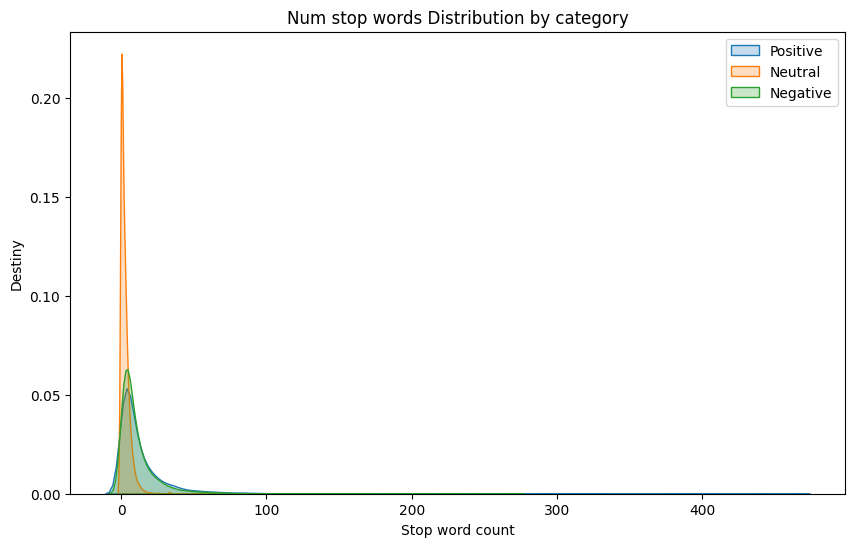

In [92]:
# create the figure and axis
plt.figure(figsize=(10,6))

# plt KDE for category 1
sns.kdeplot(df[df['category']==1]['num_stop_words'],label='Positive',fill=True)

# plot KDE for category 0
sns.kdeplot(df[df['category']==0]['num_stop_words'],label='Neutral',fill=True)

# plot kde for category -1
sns.kdeplot(df[df['category']==-1]['num_stop_words'],label='Negative',fill=True)

# Add titile and label

plt.title('Num stop words Distribution by category')
plt.xlabel('Stop word count')
plt.ylabel('Destiny')


# Add legend
plt.legend()






C:\Users\ankit.h.vishwakarma\AppData\Local\Temp\ipykernel_29268\1507450282.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_25_df,x='count',y='stop_word',palette='viridis')


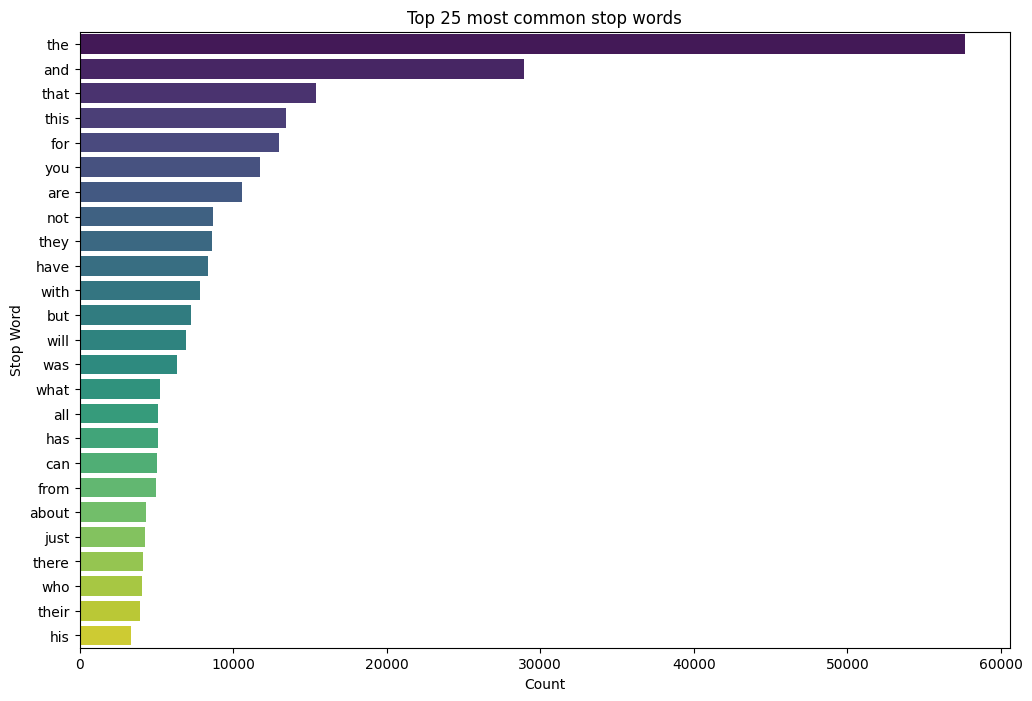

In [93]:
# create frequency distribution of stop words in the clean_comment column
from collections import Counter

# extraact all stop words from commnt using the previously defined 'common_stopwords'
all_stop_words=[word for comment in df['clean_comment'] for word in comment.split() if word in stop_words]

# count the most common stop words
most_common_stop_words=Counter(all_stop_words).most_common(25)

# convert the most common stop words to be Dataframe for plotting

top_25_df=pd.DataFrame(most_common_stop_words,columns=['stop_word','count'])

# create barplot for the top 25 most common stop words
plt.figure(figsize=(12,8))
sns.barplot(data=top_25_df,x='count',y='stop_word',palette='viridis')
plt.title('Top 25 most common stop words')
plt.xlabel('Count')
plt.ylabel('Stop Word')
plt.show()


In [94]:
# finding the characters in commnnet
df['num_chars']=df['clean_comment'].apply(len)
df.head()

,clean_comment,category,word_count,num_stop_words,num_chars,num_punctuation_chars
0,family mormon have never tried explain them t...,1,39,13,261,0
1,buddhism has very much lot compatible with chr...,1,196,59,1269,0
2,seriously don say thing first all they won get...,-1,86,40,460,0
3,what you have learned yours and only yours wha...,0,29,15,168,0
4,for your own benefit you may want read living ...,1,112,45,691,0


In [84]:
df['num_chars'].describe()

count    36799.000000
mean       182.988723
std        359.748173
min          1.000000
25%         39.000000
50%         81.000000
75%        185.500000
max       8665.000000
Name: num_chars, dtype: float64

In [95]:
# speialchar in comment
from collections import Counter

# comkbine all commnet into one large string
all_text=' '.join(df['clean_comment'])

#count the frequency of each character
char_frequency=Counter(all_text)

# convert the character frequency into a dataframe for bettr display

char_frequency_df=pd.DataFrame(char_frequency.items(),columns=['character','frequency']).sort_values(by='frequency',ascending=True)
char_frequency_df['character'].values

# df.head()

array(['∀', '￼', 'ಳ', ..., 't', 'e', ' '], shape=(1378,), dtype=object)

In [86]:
# create a column 'num_punctuation_chars' to count punctuation characters in each column
df['num_punctuation_chars']=df['clean_comment'].apply(lambda x: sum([1 for char in x if char in '.,!?;:"\'()[]{}-']))
df.sample(5)

,clean_comment,category,word_count,num_stop_words,num_chars,num_punctuation_chars
24278,redditgaumutra redditsilver kwality lost abvp...,0,11,0,77,0
19591,are you still there,0,4,3,20,0
7783,noticed trains have become punctual and slight...,-1,8,2,57,0
28448,wow that hashtag super ghoulish can only imagi...,1,17,6,111,0
14542,das dutch hast weird cycles sorry only bit ger...,1,18,5,102,0


In [87]:
df['num_punctuation_chars'].describe()


count    36799.0
mean         0.0
std          0.0
min          0.0
25%          0.0
50%          0.0
75%          0.0
max          0.0
Name: num_punctuation_chars, dtype: float64

C:\Users\ankit.h.vishwakarma\AppData\Local\Temp\ipykernel_29268\850959414.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_25_bigrams_df, x='count', y='bigram', palette='magma')


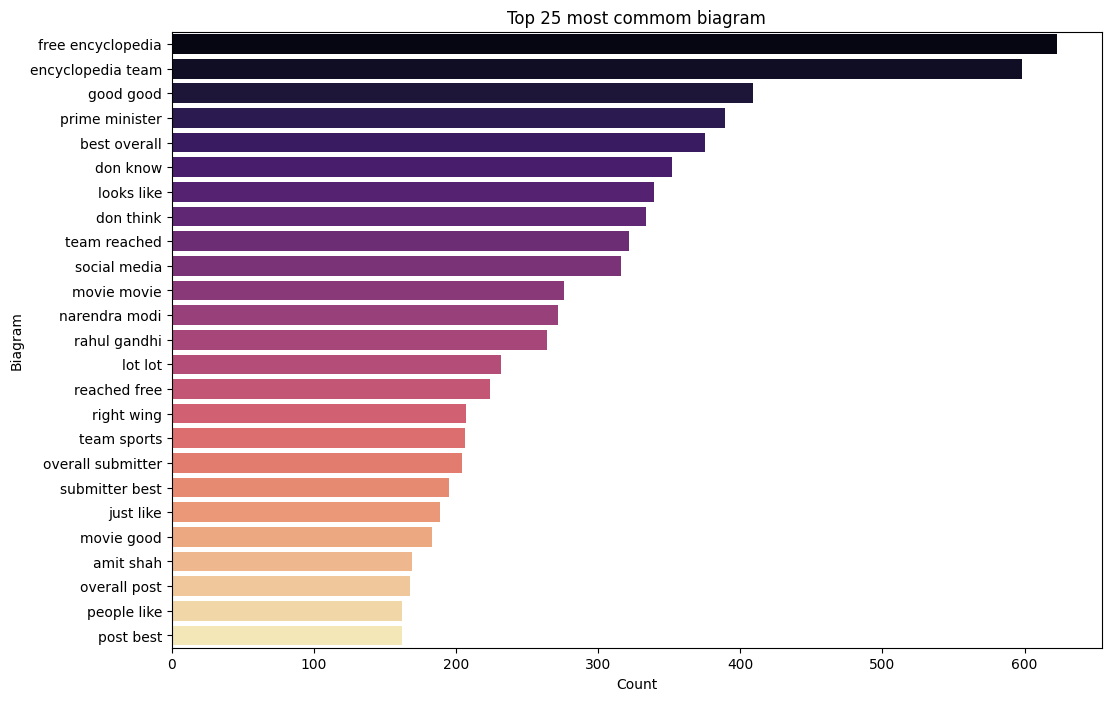

In [102]:
# create function to extract the 25 biogram
from sklearn.feature_extraction.text import CountVectorizer
def get_top_ngram(corpus,n=None):
    vec=CountVectorizer(ngram_range=(2,2), stop_words='english').fit(corpus)
    bag_of_words=vec.transform(corpus)
    sum_words=bag_of_words.sum(axis=0)
    words_freq=[(word,sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq=sorted(words_freq,key=lambda x: x[1],reverse=True)
    return words_freq[:n]

# get top 25 ngram
top_25_bigrams=get_top_ngram(df['clean_comment'], 25)

# convert the bigram into a dataframe for plotting
top_25_bigrams_df=pd.DataFrame(top_25_bigrams,columns=['bigram','count'])

# plot the countplot for 25 biagram
plt.figure(figsize=(12,8))
sns.barplot(data=top_25_bigrams_df, x='count', y='bigram', palette='magma')
plt.title('Top 25 most commom biagram')
plt.xlabel('Count')
plt.ylabel('Biagram')
plt.show()

In [ ]:
# removing non english chracter
#keeping only standard english chars digits and punctualtion 
import re

df['clean_comment']=df['clean_comment'].apply(lambda x: re.sub(r'[^A-Za-z0-9\s!?.,]', '',str(x)))


In [104]:
all_text=' '.join(df['clean_comment'])

#count the frequency of each letter
char_frequency=Counter(all_text)

# convert th charector frequency into a fatafram for better display 
char_frequency_df=pd.DataFrame(char_frequency.items(), columns=['character','frequency']).sort_values(by='frequency',ascending=True)
char_frequency_df

,character,frequency
39,,1
40,,3
37,\t,11
38,,76
33,8,1199
36,7,1291
28,6,1403
29,4,1573
35,3,1617
27,5,1631


In [105]:
df.head()

,clean_comment,category,word_count,num_stop_words,num_chars,num_punctuation_chars
0,family mormon have never tried explain them t...,1,39,13,261,0
1,buddhism has very much lot compatible with chr...,1,196,59,1269,0
2,seriously don say thing first all they won get...,-1,86,40,460,0
3,what you have learned yours and only yours wha...,0,29,15,168,0
4,for your own benefit you may want read living ...,1,112,45,691,0


In [106]:
from nltk.corpus import stopwords

# defining stop words but keeping essental ones from sentiment analysis
stop_words=set(stopwords.words('english')) - {'not','but','however','no','yet'}

# remove stop words from clean_commnet column , retaining essenstial ones

df['clean_comment']=df['clean_comment'].apply(lambda x: ' '.join([word for word in x.split() if word.lower() not in stop_words]))
df.head()

,clean_comment,category,word_count,num_stop_words,num_chars,num_punctuation_chars
0,family mormon never tried explain still stare ...,1,39,13,261,0
1,buddhism much lot compatible christianity espe...,1,196,59,1269,0
2,seriously say thing first get complex explain ...,-1,86,40,460,0
3,learned want teach different focus goal not wr...,0,29,15,168,0
4,benefit may want read living buddha living chr...,1,112,45,691,0


In [111]:
# lemmatizer

from nltk.stem import WordNetLemmatizer

nltk.download('wordnet')

# define the lemmatizer
lemmatizer=WordNetLemmatizer()

# apply lemmatizer to the 'clean_comment_no_stopword' column

df['clean_comment']=df['clean_comment'].apply(lambda x: ' '.join([lemmatizer.lemmatize(word) for word in x.split()]))
df.head()

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\ankit.h.vishwakarma\AppData\Roaming\nltk_data
[nltk_data]     ...
[nltk_data]   Package wordnet is already up-to-date!


,clean_comment,category,word_count,num_stop_words,num_chars,num_punctuation_chars
0,family mormon never tried explain still stare ...,1,39,13,261,0
1,buddhism much lot compatible christianity espe...,1,196,59,1269,0
2,seriously say thing first get complex explain ...,-1,86,40,460,0
3,learned want teach different focus goal not wr...,0,29,15,168,0
4,benefit may want read living buddha living chr...,1,112,45,691,0


In [112]:
# word count
!python -m pip install wordcloud

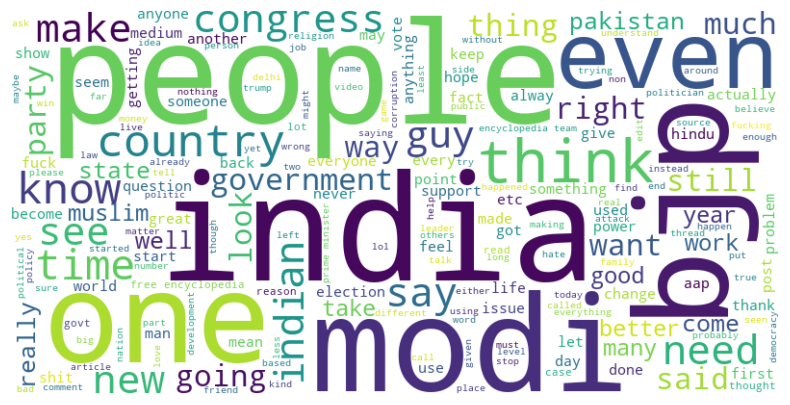

In [113]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

def plot_word_cloud(text):
    wc = WordCloud(
        width=800,
        height=400,
        background_color='white'
    ).generate(' '.join(text))
    
    plt.figure(figsize=(10,5))
    plt.imshow(wc, interpolation='bilinear')
    plt.axis("off")
    plt.show()

plot_word_cloud(df['clean_comment'].astype(str))

In [114]:
%pip install mlflow

Note: you may need to restart the kernel to use updated packages.


In [ ]:
# test mlflow
import mlflow

mlflow.set_tracking_uri()